In [248]:
# Observations
#1.The overall positive sentiment of CBS is three times greater than that of the next most positive sentiment, BBC, as 
#  observed from the Bar plot. Majority of the positive sentiments of CBS have polarities in the 0.50 - 1.00 range. 
#  Negative sentiment makes up for only about 5-6% of its sentiments. CBS singularly makes the entire dataset look more 
#  positive.

#2.The sentiment of CNN is the most neutral of all media sources in this dataset. More than 75% of the sentiments have polarities
#  ranging between -0.5 and 0.5. The sentiments in the last 35-55 tweets show a polrizing effect, possibly from an event that 
#  seems to have split the sentiment of tweets on either side. 

#3.The sentiments of New York Times are spread almost evenly across positive, negative and neutral; although the polarity of
#  of the negative sentiments is on the higher side. The negative sentiment of Fox news outweighs the positive,  
#  whereas the positive sentiment of BBC outweighs the negative, as interpreted form the Scatter plot. 

In [249]:
import csv
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

consumer_key = "LMtZORnSAtkcqudxzHjKWTRlH"
consumer_secret = "K2a1pPsJwnmcM2N3DXvUWbp3Afx9vcOYgbSNKnaN7nwZ5vhVMb"
access_token = "975046253020000256-FPDkdEiXyXVfjQhVAVTbgDPrbN9WCft"
access_token_secret = "QZDWyiLSNtOKbIvp9LFWhw3KZ33rkWixaN1h1Hh1Cxe02"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [250]:
source_account=[]
date=[]
all_texts=[]
compound_list=[]
positive_list=[]
negative_list=[]
neutral_list=[]

target_user = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']
        
for user in target_user:
        
        public_tweets = api.user_timeline(user, count=100, result_type ="recent")        
    
        for tweet in public_tweets:
       
            account = tweet["user"]["name"]
            source_account.append(account)
            
            tweet_date = tweet["created_at"]
            converted_date = datetime.strptime((tweet_date), "%a %b %d %H:%M:%S %z %Y")
            dt = datetime.date(converted_date)
            formatted_date = dt.strftime('%m/%d/%Y')
            date.append(formatted_date)
        
            all_texts.append(tweet["text"])
        
            compound_list.append(analyzer.polarity_scores(tweet["text"])["compound"])
            positive_list.append(analyzer.polarity_scores(tweet["text"])["pos"])
            negative_list.append(analyzer.polarity_scores(tweet["text"])["neg"])
            neutral_list.append(analyzer.polarity_scores(tweet["text"] )["neu"])    

In [251]:
sentiments_df = pd.DataFrame({
    "Source Account":source_account,
    "Date":date,
    "Text":all_texts,
    "Compound":compound_list,
    "Positive":positive_list,
    "Negative":negative_list,
    "Neutral":neutral_list
})
sentiments_df = sentiments_df[["Source Account","Date","Text","Compound","Positive","Negative","Neutral"]]
sentiments_df.to_csv("sentiments_csv", index=False)
sentiments_df.head()

,Source Account,Date,Text,Compound,Positive,Negative,Neutral
0,BBC,03/28/2018,🇮🇪 This 800-year-old hotel in Ireland is simpl...,0.0000,0.000,0.000,1.000
1,BBC,03/28/2018,📚 'Words do not live in dictionaries. They liv...,0.2960,0.109,0.000,0.891
2,BBC,03/28/2018,The government rates the global outbreak of a ...,-0.8225,0.000,0.312,0.688
3,BBC,03/28/2018,Slacking off in Dubai. https://t.co/a3oSKIxfSK,0.0000,0.000,0.000,1.000
4,BBC,03/28/2018,RT @BBCTheOneShow: The fantastic @george_ezra ...,0.7506,0.280,0.000,0.720


In [252]:
bbc_df = sentiments_df.loc[sentiments_df["Source Account"] == "BBC", ["Compound"]]
bbc_x = np.arange(-len(bbc_df), 0, 1)
bbc_x = -(bbc_x)

In [253]:
cbs_df = sentiments_df.loc[sentiments_df["Source Account"] == "CBS", ["Compound"]]
cbs_x = np.arange(-len(cbs_df), 0, 1)
cbs_x = -(cbs_x)

In [254]:
cnn_df = sentiments_df.loc[sentiments_df["Source Account"] == "CNN", ["Compound"]]
cnn_x = np.arange(-len(cnn_df), 0, 1)
cnn_x = -(cnn_x)

In [255]:
fox_df = sentiments_df.loc[sentiments_df["Source Account"] == "Fox News", ["Compound"]]
fox_x = np.arange(-len(fox_df), 0, 1)
fox_x = -(fox_x)

In [256]:
nyt_df = sentiments_df.loc[sentiments_df["Source Account"] == "The New York Times", ["Compound"]]
nyt_x = np.arange(-len(nyt_df), 0, 1)
nyt_x = -(nyt_x)

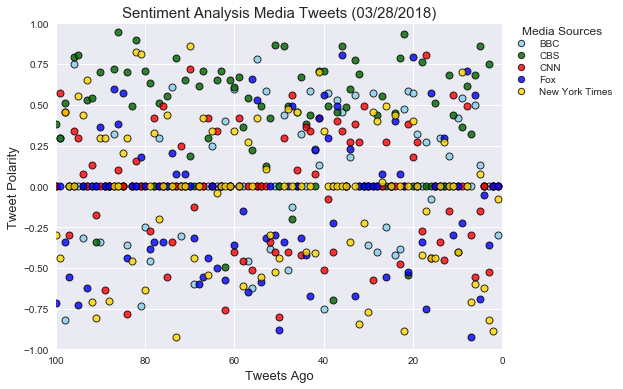

In [257]:
sns.set()
plt.figure(figsize=(8,6))
plt.xlim(100,0)
plt.ylim(-1.0,1.0)
plt.title(f'Sentiment Analysis Media Tweets ({sentiments_df.iloc[0,1]})',fontsize=15)
plt.ylabel("Tweet Polarity",fontsize=13)
plt.xlabel("Tweets Ago",fontsize=13)

plt.scatter(bbc_x, bbc_df["Compound"],facecolor="skyblue", edgecolors="black", linewidth=1, alpha=0.8, label="BBC")
plt.scatter(cbs_x, cbs_df["Compound"],facecolor="darkgreen", edgecolors="black", linewidth=1, alpha=0.8, label="CBS")
plt.scatter(cnn_x, cnn_df["Compound"],facecolor="red", edgecolors="black", linewidth=1, alpha=0.8, label="CNN")
plt.scatter(fox_x, fox_df["Compound"],facecolor="blue", edgecolors="black", linewidth=1, alpha=0.8, label="Fox")
plt.scatter(nyt_x, nyt_df["Compound"],facecolor="gold", edgecolors="black", linewidth=1, alpha=0.8, label="New York Times")

lgnd = plt.legend(fontsize="small", 
                  numpoints=1, scatterpoints=1, 
                  loc="lower left", title="Media Sources", 
                  bbox_to_anchor=(1.0,0.75),
                  labelspacing=0.3)
for handle in lgnd.legendHandles:
    handle.set_sizes([40])

plt.savefig("Tweet Sentiment Analysis.png")
plt.show()

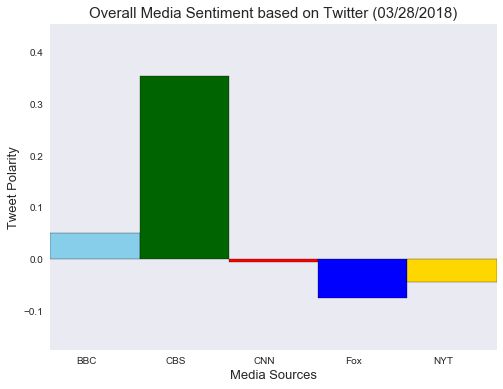

In [258]:
sns.set_style("dark")
plt.figure(figsize=(8,6))
plt.title(f'Overall Media Sentiment based on Twitter ({sentiments_df.iloc[0,1]})',fontsize=15)
plt.ylabel("Tweet Polarity",fontsize=13)
plt.xlabel("Media Sources",fontsize=13)

overall_sentiment = sentiments_df.groupby("Source Account")["Compound"].mean()
x_axis = np.arange(len(overall_sentiment))
y_axis = overall_sentiment
colors = ["skyblue","darkgreen","red","blue","gold"]
edgecolors = ["black","black","black","black","black"]

plt.bar(x_axis, y_axis, width = 1, align="edge", color=colors, edgecolor=edgecolors)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.xlim(0, len(x_axis))
plt.ylim(min(y_axis)-0.1, max(y_axis)+0.1)

plt.savefig("Overall Media Sentiment.png")
plt.show()